# Introduction to wavelet analysis

## Why not use Fourier analysis?

In Fourier analysis, you decompose a time series in its different periodic components, i. e. frequencies. However, Fourier analysis does not tell you how those frequencies change over time. Wavelet analysis, on the other hand tells you, which frequencies are present at a certain time.

## Example: Periodic time series with noise

### 1. Constant frequency

Let's define a sine function over a certain time interval and add noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.arange(0, 1000, 1)

y = np.sin(t/10) + np.random.normal(0, 0.1, 1000)

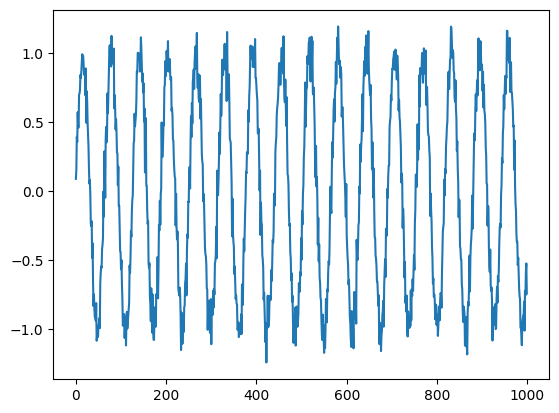

In [3]:
plt.plot(t, y)

Next, we look at the power spectrum of the function. It is defined as the squared absolute of the Fourier transform and thus gives the distribution of power in frequency space. For computing the Fourier transform, we use the in-built function `np.fft.fft()`

In [4]:
fft = np.fft.fft(y)
freq = np.fft.fftfreq(t.shape[-1])
power = (np.abs(fft))**2

/tmp/ipykernel_3279958/2623781591.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, power)


(40.0, 80.0)

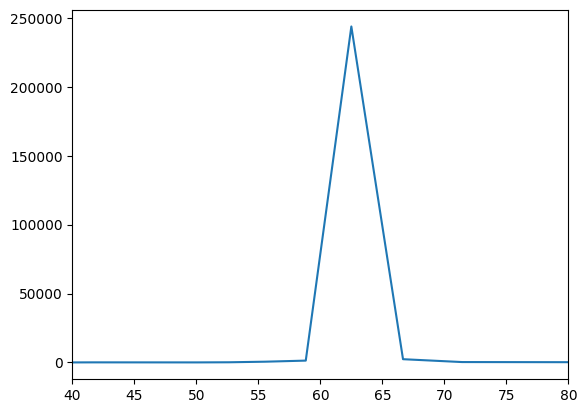

In [5]:
plt.plot(1/freq, power)
plt.xlim(40, 80)

In this example, the power spectrum / Fourier transform is sufficient because the frequency does not change over time. We will now look at an example with a time-dependent frequency.

### 2. Time-dependent frequency

In [6]:
t1 = np.arange(0, 500, 1)
t2 = np.arange(500, 1000, 1)

y1 = np.sin(t1/5) + np.random.normal(0, 0.1, 500)
y2 = np.sin(t2/15) + np.random.normal(0, 0.1, 500)

In [7]:
y = y1
y = np.append(y, y2)

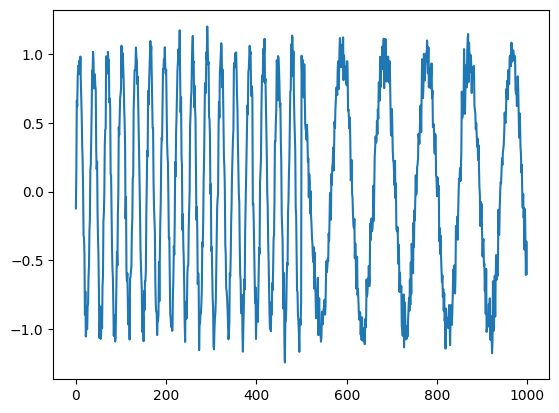

In [8]:
plt.plot(t, y)

We will compare that time series to a time series where both frequencies are present over the whole time interval.

In [9]:
z1 = np.sin(t/5)
z2 = np.sin(t/15)

z = (z1 + z2) / 2 + np.random.normal(0, 0.1, 1000)

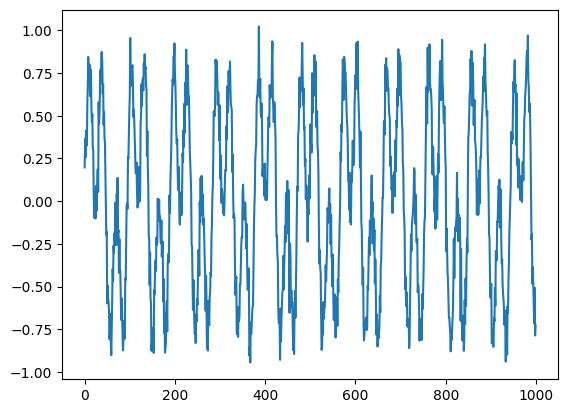

In [10]:
plt.plot(t, z)

Let's take a look at the power spectra.

In [11]:
fft1 = np.fft.fft(y)
fft2 = np.fft.fft(z)

freq = np.fft.fftfreq(t.shape[-1])

power1 = (np.abs(fft1))**2
power2 = (np.abs(fft2))**2

/tmp/ipykernel_3279958/2077592769.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, power1)
/tmp/ipykernel_3279958/2077592769.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, power2)


(0.0, 200.0)

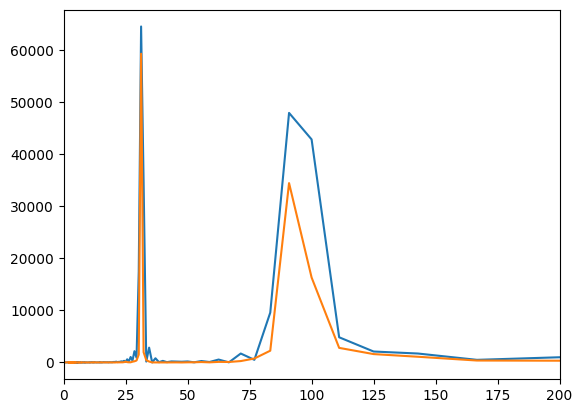

In [12]:
plt.plot(1/freq, power1)
plt.plot(1/freq, power2)
plt.xlim(0, 200)

In this case, the power spectrum obviously does not provide enough information to distinguish the two time series. We will see whether the wavelet analysis does a better job.

## Wavelet analysis: Example

In [13]:
import pycwt as wavelet


In [14]:
#the continuous wavelet transform function cwt requires some parameters defined in the following. At this point, you do not need to understand what they mean.
#the values given here are the default values.

dt = 1
dj = 1/12
s0 = 2*dt
mother = wavelet.Morlet(6)
J = 7/dj

wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = wavelet.cwt(y, dt, dj, s0, J, mother)
wave2, scales2, freqs2, coi2, fft2, fftfreqs2 = wavelet.cwt(z, dt, dj, s0, J, mother)

In [15]:
power1 = (np.abs(wave1)) ** 2
power2 = (np.abs(wave2)) ** 2

period1 = 1/freqs1
period2 = 1/freqs2

In [16]:
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]

([<matplotlib.axis.YTick at 0x7fff753612e0>,
 [Text(0, 2.0, '4.0'),
  Text(0, 3.0, '8.0'),
  Text(0, 4.0, '16.0'),
  Text(0, 5.0, '32.0'),
  Text(0, 6.0, '64.0'),
  Text(0, 7.0, '128.0'),
  Text(0, 8.0, '256.0')])

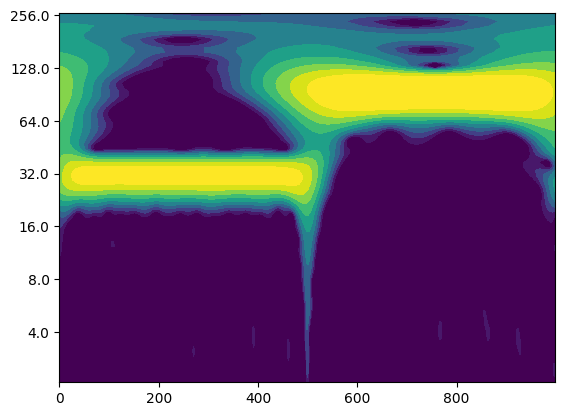

In [17]:
fig, ax = plt.subplots()
im = plt.contourf(t, np.log2(period1), np.log2(power1), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
Yticks = 2 ** np.arange(np.ceil(np.log2(period1.min())),
                           np.ceil(np.log2(period1.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)

([<matplotlib.axis.YTick at 0x7fff75378370>,
 [Text(0, 2.0, '4.0'),
  Text(0, 3.0, '8.0'),
  Text(0, 4.0, '16.0'),
  Text(0, 5.0, '32.0'),
  Text(0, 6.0, '64.0'),
  Text(0, 7.0, '128.0'),
  Text(0, 8.0, '256.0')])

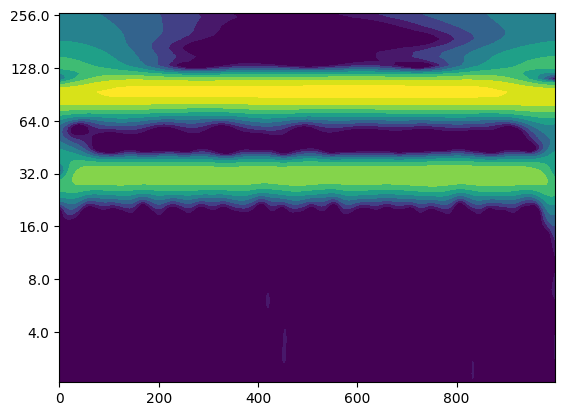

In [18]:
fig, ax = plt.subplots()
im = plt.contourf(t, np.log2(period2), np.log2(power2), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
Yticks = 2 ** np.arange(np.ceil(np.log2(period2.min())),
                           np.ceil(np.log2(period2.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)

### <font color=blue>**Question**: </font>What do you observe?

## What is the theory behind wavelet analysis?

The foundation of a wavelet transform is the so-called mother wavelet. There are different types. In this course we use the Morlet wavelet which looks like

$$ \psi(t) = \pi^{1/4} \exp (i\omega t) \exp {-t^2/2} $$

with $\omega = 6$.

Let's see how the real and imaginary part of that function look like.

In [19]:
def morlet_wavelet(t):
    return (np.pi**(1/4) * np.exp(6j*t) * np.exp(-t**2/2))

In [20]:
t = np.arange(-6,6,0.01)
psi = morlet_wavelet(t)

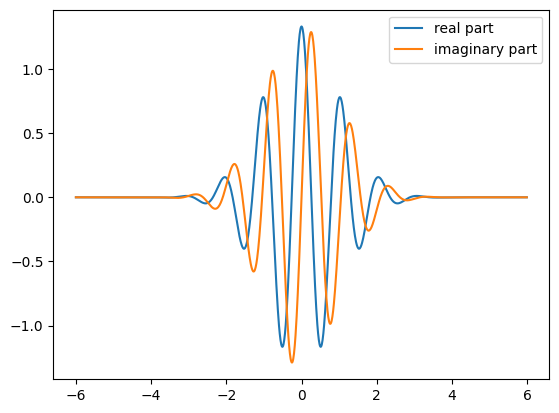

In [21]:
plt.plot(t, np.real(psi), label = "real part")
plt.plot(t, np.imag(psi), label = "imaginary part")
plt.legend()

The continuous wavelet transform $CWT$ of a time series $x_t$ is defined as the convolution of that time series with a set of "wavelet daughters" generated by the mother wavelet by shifting it in time $\tau$ and scaling it by $s$. For a specific $\tau$ and $s$ it looks like:

$$ CWT(\tau, s) = \sum_t x_t \frac{1}{\sqrt{s}} \psi^* \biggl( \frac{t - \tau}{s} \biggl), $$

where * denotes the complex conjugate.

What exactly does varying $\tau$ and $s$ mean?

Varying $\tau$ means that we move the wavelet along the time axis (**"translation"**). Varying $s$ means varying the frequency of the wavelet (**"scaling"**). The higher the frequency, the more the wavelet is localized in time. See below, how the Morlet wavelet looks like for frequencies of 1, 5, 10 and 20 Hz:

![](https://sapienlabs.org/wp-content/uploads/2019/11/wavelets-examples.png)

To compute the "total" $CWT$, we would need to loop over all scales for each time step. But there is also an easier way: By making a discrete Fourier transform (FFT), we can perform all time steps at once. This is because of the convolution theorem which tells us that the convolution of two functions $g$ and $h$ is equal to the inverse Fourier transform $\mathcal{F}^{-1}$ of the product of the two Fourier transforms $\hat g$ and $\hat h$, i. e.:

$$ (g * h)(\tau) = \mathcal{F}^{-1}(\hat g \cdot \hat h) $$

When we apply this to our wavelet transform, we get:

$$ CWT(\tau, s) = \sum_k \hat x_k \hat \psi^* (s\omega_k) \exp^{i\omega_k \tau}, $$

with $\omega_k = \pm \frac{2 \pi k}{\tau}$.

Let's apply this to a simple example (the function z we defined above) and try to re-build the wavelet transform of z.

In [22]:
t = np.arange(0, 1000, 1)

z1 = np.sin(t/5)
z2 = np.sin(t/15)

z = (z1 + z2) / 2 + np.random.normal(0, 0.1, 1000)

In [23]:
def morlet_wavelet(t):
    return (np.pi**(1/4) * np.exp(6j*t) * np.exp(-t**2/2))

def morlet_fft(w):
    return (np.pi**(-1/4) * np.exp(-1/2 * (w-6)**2))

We start by computing the Fourier transform of our signal:

In [24]:
f = np.fft.fft(z)

Now we need to define the timestep $dt$ by which we vary $\tau$, the minimum scale $s_0$ to be considered and variation $dj$ of the scales:

In [25]:
dt = 1
s0 = 2*dt
dj = 1/12

We also need the length of the time series: 

In [26]:
n = len(t)

Next, we determine the frequencies $\omega_k$ of the fourier transform $f$:

In [27]:
freq = np.linspace(0, (len(f) - 1)/len(f) * 2 * np.pi, 1000)

Now we determine the scales $s$:

In [28]:
J1 = np.round(np.log2(n * dt / s0) / dj)
scale = np.arange(s0, s0 * 2**(J1*dj), s0 * 2**dj)

Finally, we can compute the wavelet:

In [29]:
wave = np.zeros((int(J1) + 1, n), dtype = 'F')

In [30]:
for a in np.arange(0, int(J1) + 1, 1):
    psi_star = np.conjugate(morlet_fft(scale[a] * freq))
    psi_ft_bar = ((scale[a] * n)**0.5) * psi_star
    cwt = np.fft.ifft(f * psi_ft_bar)
    for i in np.arange(0, n, 1):
        wave[a, i] = cwt[i].real + 1j*cwt[i].imag

Let's take a look at the power spectrum of our wavelet:

In [31]:
power = np.abs(wave)**2

([<matplotlib.axis.YTick at 0x7fff750bdd90>,
 [Text(0, 1, '2'),
  Text(0, 2, '4'),
  Text(0, 3, '8'),
  Text(0, 4, '16'),
  Text(0, 5, '32'),
  Text(0, 6, '64'),
  Text(0, 7, '128')])

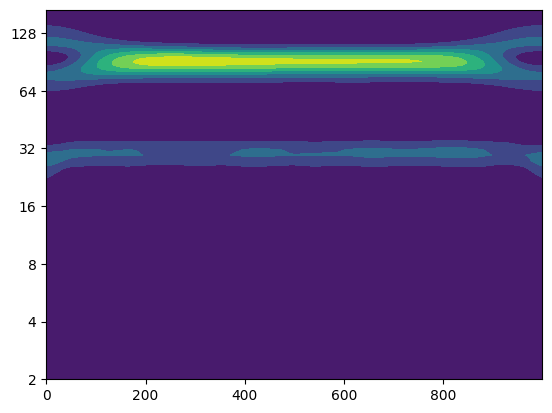

In [32]:
new_data = np.transpose(power)
Range =  np.arange(0, len(f), 1)

plt.contourf(Range, np.log2(scale[0:80]), power[0:80,])
plt.yticks([1, 2, 3, 4, 5, 6, 7], labels = ["2", "4", "8", "16", "32", "64", "128"])

### <font color=red>**Exercise**: </font> Define a simple periodic function (e. g. a superposition of 3 different sine waves) and compute its wavelet by using the wavelet.cwt() function.

# Wavelet analysis of saltwater inflows to the Baltic Sea

In the lecture you have already learned something about the properties of saltwater inflows from the North Sea into the Baltic Sea. We now want to perform wavelet analysis on these inflows to check whether there is any periodicity. As raw data we use the major baltic inflow (MBI) time series prepared by Volker Mohrholz ranging from 1887 to 2021. Make sure you have the file "salt_import_DS5_ann_norm.txt" in your folder. It lists the annual salt import from MBIs in Gt. Possible linear trends have been removed and the salt import has been normalized by dividing it by its standard deviation (that is common data preprocessing for wavelet analysis). If you are not in your own working directory, type ```import os``` and ```os.chdir("/students_files/your_surname/")``` to get in your directory before you read in the data.

### <font color=red>**Exercise**: </font>Read in the file using the function np.loadtxt() and call the resulting numpy array "saltimport". Define a numpy array "years" ranging from 1887 to 2022 and plot the salt import.

In [33]:
saltimport = np.loadtxt("salt_import_DS5_ann_norm.txt")

In [34]:
years = np.arange(1887, 2022, 1)

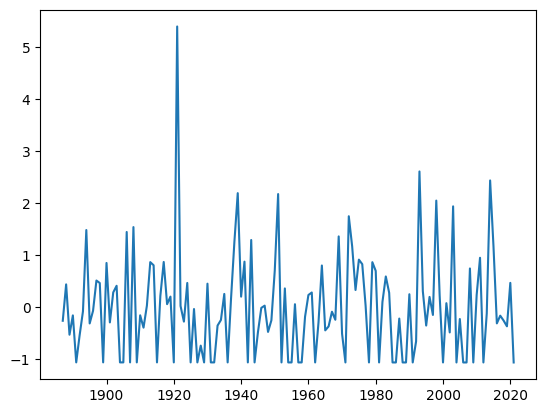

In [35]:
#plot saltimport versus years
plt.plot(years, saltimport)

For a first check on whether the time series exhibits any kind of low frequency variability, we can calculate a running mean, e. g. 11-year running mean:

In [36]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [37]:
saltimport_11 = moving_average(saltimport, 11)

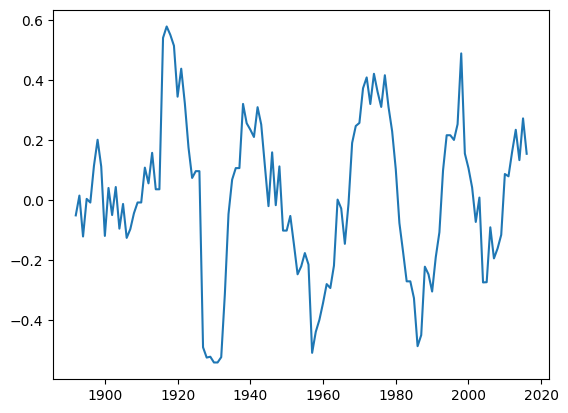

In [38]:
plt.plot(years[5:-5], saltimport_11)

This looks indeed as if there is some variability on a time scale of 20 to 30 years at least since about 1920. Wavelet analysis will hopefully tell us more.

### <font color=red>**Exercise**: </font>Now calculate the wavelet (with wavelet.cwt() as before) and plot its power.

In [39]:
#calculate wavelet

In [40]:
levels = [0.25, 0.5, 1, 2, 4, 8, 16]

In [41]:
#plot wavelet power spectrum

### <font color=blue>**Question**: </font>How would you interpret this figure?

## Cone of influence

The edges of the spectrum are difficult to interpret since our time series is finite (but the Fourier transform requires an infinitely periodic function). In order to see in which regions edge effects play a role, we can define a so-called "cone of influence". Let's plot the last figure again including the cone of influence:

NameError: name 'period' is not defined

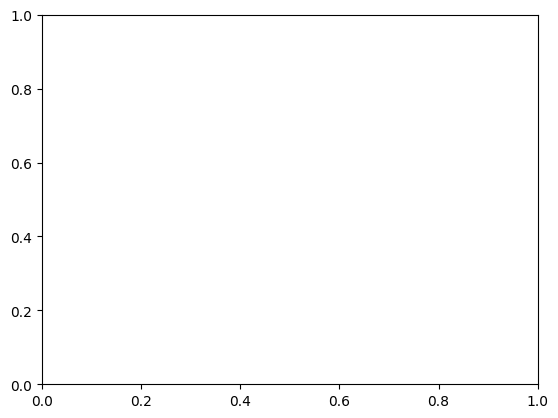

In [42]:
fig, ax = plt.subplots()
im = plt.contourf(years, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
plt.fill(np.concatenate([years, years[-1:] + dt, years[-1:] + dt,
                           years[:1] - dt, years[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)
plt.ylim(1, 7)

This shows that especially wavelet power at very low frequencies has to be interpreted carefully.

## Global power spectrum

If you average the wavelet power spectrum along the time axis, you get the so-called "global power spectrum". Not very surprisingly (since both of them live in frequency space), it is comparable to the Fourier spectrum (more precisely a smoothed version of it) as you can see below.

In [ ]:
global_power = power.mean(axis=1)

In [ ]:
fft_power = (np.abs(fft)) ** 2

In [ ]:
plt.plot(global_power, np.log2(period), label = "global wavelet power")
plt.plot(fft_power, np.log2(1/fftfreqs), alpha = 0.5, label = "Fourier spectrum")
plt.yticks(np.log2(Yticks), labels = Yticks)
plt.legend()

## Noise

Let's find out how the wavelet power spectrum of noise looks like.

In [ ]:
noise = np.random.normal(0, 0.1, 1000)

In [ ]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(noise, dt, dj, s0, J, mother)

In [ ]:
power = (np.abs(wave)) ** 2

In [ ]:
period = 1/freqs

In [ ]:
levels = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1]

In [ ]:
fig, ax = plt.subplots()
im = plt.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)

You see that there is another challenge when it comes to interpreting wavelet power spectra - you have to distinguish what is "real" periodicity and what is just caused by noise.

# Wavelet coherence (advanced)

Let's get back to our salt import time series. We might wonder what causes the periodicities in the time series. As you maybe remember from the lectures, the river runoff to the Baltic Sea has an impact on the saltwater inflows. Let's find out how the wavelet power spectrum of annual mean river runoff looks like.

In [ ]:
runoff = np.loadtxt("runoff_ann_norm.txt")

In [ ]:
years2 = np.arange(1850, 2009, 1)

In [ ]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(runoff, dt, dj, s0, J, mother)

In [ ]:
power = (np.abs(wave)) ** 2

In [ ]:
period = 1/freqs

In [ ]:
levels = [0.25, 0.5, 1, 2, 4, 8, 16]

In [ ]:
fig, ax = plt.subplots()
im = plt.contourf(years2, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)
plt.ylim(1, 7)
plt.fill(np.concatenate([years2, years2[-1:] + dt, years2[-1:] + dt,
                           years2[:1] - dt, years2[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')

Indeed, the wavelet power spectrum shows power between 16 and 32 years. In order to really find out whether the salt import and the river runoff vary on comparable time scales, we can compute the so-called "wavelet coherence" (or cross-correlation). Note: The time ranges of the two time series are different.

In [ ]:
years3 = np.arange(1887, 2009, 1)

In [ ]:
WCT, aWCT, corr_coi, freq, sig = wavelet.wct(runoff[37:], saltimport[:122], dt, dj, s0=-1, J=-1,
                                             significance_level=0.8646,
                                             wavelet='morlet', normalize=True,
                                             cache=True)

In [ ]:
cor_period = 1 / freq

In [ ]:
extent_corr = [years3.min(), years3.max(), 0, max(cor_period)]

In [ ]:
from matplotlib.image import NonUniformImage

In [ ]:
fig, ax = plt.subplots()
im = NonUniformImage(ax, interpolation='bilinear', extent=extent_corr)
im.set_data(years3, cor_period, WCT)
levels = np.linspace(0, 1, 11)

im = ax.contourf(years3, np.log2(cor_period), WCT, levels,
            extent=extent_corr, cmap=plt.cm.viridis, antialiased = True)
ax.fill(np.concatenate([years3, years3[-1:]+dt, years3[-1:]+dt, years3[:1]-dt, years3[:1]-dt]),
         np.concatenate([np.log2(corr_coi), [1e-9], np.log2(cor_period[-1:]), np.log2(cor_period[-1:]),
                         [1e-9]]), 'k', alpha=0.3, hatch='x')
ax.set_title('Cross-Correlation')
ax.set_ylim(1, 7)
Yticks = 2 ** np.arange(np.ceil(np.log2(cor_period.min())),
                           np.ceil(np.log2(cor_period.max())))
ax.set_xlim(years3.min(), years3.max())
plt.yticks(np.log2(Yticks), labels = Yticks)

This shows us, at what times and in which frequency ranges the two time series are correlated. You could additionally add a quiver plot to show the phase differences, i. e., which of the two time series is leading where.


# Significance (advanced)

So far, we have looked at many different wavelet power spectra but we never cared about whether the power we see at a certain time and period is significant. And what does significance actually mean in this context? For this, let's get back to our salt import time series and re-plot the (global) wavelet power spectrum including significance levels. Let's start with the global power spectrum.

In [ ]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(saltimport, dt, dj, s0, J, mother)

In [ ]:
power = (np.abs(wave)) ** 2

In [ ]:
period = 1/freqs

In [ ]:
alpha, _, _ = wavelet.ar1(saltimport)

In [ ]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, len(years)]) * signif[:, None]
sig95 = power / sig95

In [ ]:
global_power = power.mean(axis=1)
dof = len(years) - scales
global_signif, tmp = wavelet.significance(1.0, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [ ]:
plt.plot(global_power, np.log2(period))
plt.plot(global_signif, np.log2(period), 'k--')
plt.yticks(np.log2(Yticks), labels = Yticks)

So what have we done here? The black dashed line shows where the global power spectrum gets significant. So apparently, there is only very little significant wavelet power at about 30 years. The black line displays the global wavelet power of a red-noise process (as you learned in the lecture, many time series in climate and ocean science can be modelled by red-noise precesses).Thus, significance in this context means "significantly different from a simple red noise process". Now, let's also replot the wavelet power spectrum with significance levels.

In [ ]:
levels = [0.25, 0.5, 1, 2, 4, 8, 16]

In [ ]:
fig, ax = plt.subplots()
im = plt.contourf(years, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
extend = [years.min(), years.max(), 0, max(period)]
plt.contour(years, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2, extend=extend)
plt.fill(np.concatenate([years, years[-1:] + dt, years[-1:] + dt,
                           years[:1] - dt, years[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)
plt.ylim(1, 7)

### <font color=blue>**Question**: </font> How would you interpret the results? Do you have any idea what could cause the significant power at periods of about 20-30 years?

# For further reading

Torrence, C. and Compo, G. P.: A Practical Guide to Wavelet Analysis, Bulletin of the American Meteorological Society Vol. 79, No. 1, January 1998, https://doi.org/10.1175/1520-0477(1998)079<0061:APGTWA>2.0.CO;2

https://github.com/regeirk/pycwt/ and https://pycwt.readthedocs.io/en/latest/ for pycwt documentation and sample scripts